## Displaying a Well Plot with Matplotlib

### Loading Well Data from LAS

In [1]:
import lasio as ls
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

las = ls.read("WLC_PETRO_COMPUTED_INPUT_1.LAS")
well = las.df()
well.reset_index(inplace=True)
well.replace([-999.25, -999.00], np.nan, inplace=True)

In [2]:
well.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35361 entries, 0 to 35360
Data columns (total 20 columns):
DEPTH       35361 non-null float64
ABDCQF01    10502 non-null float64
ABDCQF02    10502 non-null float64
ABDCQF03    10502 non-null float64
ABDCQF04    10504 non-null float64
BS          35361 non-null float64
CALI        10745 non-null float64
DRHO        10647 non-null float64
DT          10224 non-null float64
DTS         10214 non-null float64
GR          34671 non-null float64
NPHI        10524 non-null float64
PEF         10551 non-null float64
RACEHM      34211 non-null float64
RACELM      34211 non-null float64
RHOB        10551 non-null float64
ROP         34477 non-null float64
RPCEHM      34211 non-null float64
RPCELM      34211 non-null float64
RT          34211 non-null float64
dtypes: float64(20)
memory usage: 5.4 MB


In [3]:
well.describe()

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RHOB,ROP,RPCEHM,RPCELM,RT
count,35361.000000,10502.000000,10502.000000,10502.000000,10504.000000,35361.000000,10745.000000,10647.000000,10224.000000,10214.000000,34671.000000,10524.000000,10551.000000,34211.000000,34211.000000,10551.000000,34477.000000,34211.000000,34211.000000,34211.000000
mean,1913.900000,2.481041,2.484954,2.488893,2.484137,17.887317,8.608636,0.049923,76.677725,140.353716,58.276629,0.170238,6.813543,1.868242,1.796210,2.482658,30.214852,3.597447,1.667340,3.597447
std,1020.798577,0.140198,0.141846,0.143723,0.140472,7.440822,0.062221,0.013428,12.817042,25.740441,42.940264,0.100083,1.065816,29.837728,17.207245,0.140218,20.721234,261.345310,1.914388,261.345310
min,145.900000,1.933100,1.952400,1.942200,1.967300,8.500000,7.938000,-0.103500,56.382300,96.900700,0.149100,0.029000,4.297800,0.195500,0.234900,1.980600,0.005100,0.142500,0.128200,0.142500
25%,1029.900000,2.405325,2.408700,2.411400,2.409400,8.500000,8.578100,0.045400,67.869250,121.976725,29.909850,0.103300,6.058200,0.820700,0.769800,2.405950,19.951800,0.761300,0.724700,0.761300
50%,1913.900000,2.533700,2.539050,2.542050,2.538100,17.500000,8.624900,0.049900,73.309500,133.162700,57.363200,0.144050,7.141300,1.196900,1.159400,2.536000,27.125700,1.179100,1.145100,1.179100
75%,2797.900000,2.581475,2.586300,2.591300,2.584700,26.000000,8.625000,0.055200,82.502475,146.433100,79.242850,0.214200,7.688600,1.880300,1.751400,2.583500,33.260000,1.998600,1.870950,1.998600
max,3681.900000,3.164700,3.065600,3.268300,2.939700,36.000000,9.741100,0.127500,116.231600,217.969900,587.017200,0.593200,10.758300,5464.369100,2189.603000,2.931500,151.127400,46224.449200,159.890700,46224.449200


### Setting up the logplot

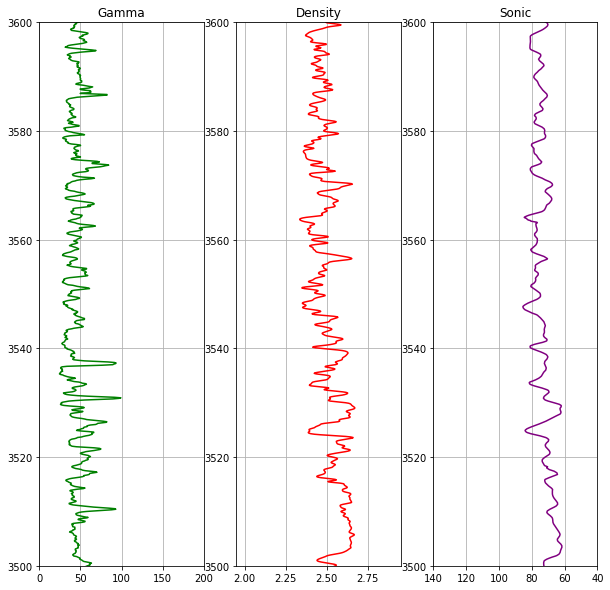

In [4]:
fig = plt.subplots(figsize=(10,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)

ax1.plot("GR", "DEPTH", data = well, color = "green") # Call the data from the well dataframe
ax1.set_title("Gamma") # Assign a track title
ax1.set_xlim(0, 200) # Change the limits for the curve being plotted
ax1.set_ylim(3500, 3600) # Set the depth range
ax1.grid() # Display the grid

ax2.plot("RHOB", "DEPTH", data = well, color = "red")
ax2.set_title("Density")
ax2.set_xlim(1.95, 2.95)
ax2.set_ylim(3500, 3600)
ax2.grid()

ax3.plot("DT", "DEPTH", data = well, color = "purple")
ax3.set_title("Sonic")
ax3.set_xlim(140, 40)
ax3.set_ylim(3500, 3600)
ax3.grid()


#### Customising the Log Plot
We can further customise the plot to look more like a familiar log plot, with the curve names and scales at the top and two curves (density & neutron) in the one track.

Enter starting depth: 3500
Enter ending depth: 3600


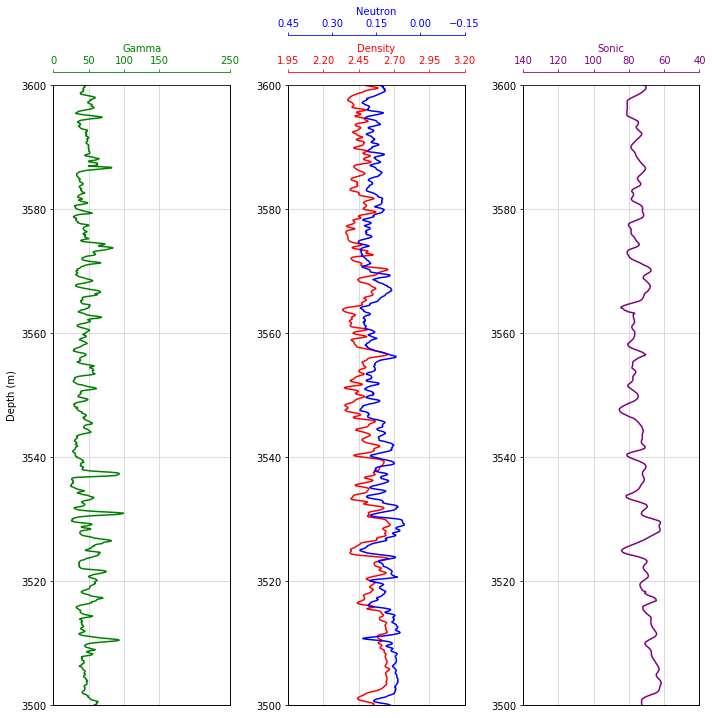

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)
ax4 = ax2.twiny() #Twins the y-axis for the density track with the neutron track

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax7 = ax1.twiny()
ax7.xaxis.set_visible(False)
ax8 = ax2.twiny()
ax8.xaxis.set_visible(False)
ax9 = ax3.twiny()
ax9.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = well, color = "green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 250])

# Density track
ax2.plot("RHOB", "DEPTH", data = well, color = "red")
ax2.set_xlabel("Density")
ax2.set_xlim(1.95, 2.95)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([1.95, 2.2, 2.45, 2.7, 2.95,3.20])

# Sonic track
ax3.plot("DT", "DEPTH", data = well, color = "purple")
ax3.set_xlabel("Sonic")
ax3.set_xlim(140, 40)
ax3.xaxis.label.set_color("purple")
ax3.tick_params(axis='x', colors="purple")
ax3.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax4.plot("NPHI", "DEPTH", data = well, color = "blue")
ax4.set_xlabel('Neutron')
ax4.xaxis.label.set_color("blue")
ax4.set_xlim(0.45, -0.15)
ax4.set_ylim(4850, 4600)
ax4.tick_params(axis='x', colors="blue")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.spines["top"].set_edgecolor("blue")
ax4.set_xticks([0.45, 0.3, 0.15,0, -0.15])

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
# Get limits from the user (e.g., via input())

min_depth = float(input("Enter starting depth: "))
max_depth = float(input("Enter ending depth: "))
y_lim = (min_depth, max_depth)

for ax in [ax1, ax2, ax3]:
    ax.set_ylim(y_lim)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
plt.tight_layout()